In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numdifftools as nm

# Part e

In [36]:
def prepare_data(chosenspecies):
    df = pd.read_csv('F:/Uni/991/Pattern/SPR_HW3/SPR_HW3/inputs/P6/penguins.csv')
    df = df.loc[:,['bill_length_mm', 'bill_depth_mm', 'species']]
    df = df.fillna(df.mean())
    df = df.sample(frac=1 ,replace=False, axis = 0).reset_index(drop=True)
    df_train = df.iloc[:300]
    df_test = df.iloc[300:]
    df_train1 = pd.concat([df_train[df_train['species']==chosenspecies[1]], df_train[df_train['species']==chosenspecies[0]]]).reset_index(drop=True)
    df_train1 = pd.concat([pd.DataFrame({'x0':np.ones((df_train1.shape[0]))}), df_train1], axis=1)
    df_train1 = df_train1.sample(frac=1 ,replace=False, axis = 0).reset_index(drop=True)
    df_test1 = pd.concat([df_test[df_test['species']==chosenspecies[1]], df_test[df_test['species']==chosenspecies[0]]]).reset_index(drop=True)
    df_test1 = pd.concat([pd.DataFrame({'x0':np.ones((df_test1.shape[0]))}), df_test1], axis=1)
    df_test1 = df_test1.sample(frac=1 ,replace=False, axis = 0).reset_index(drop=True)
    for i in range(df_train1.shape[0]):
        if df_train1.loc[i,'species'] == chosenspecies[1]:
            df_train1.loc[i, 'x0']*=-1
            df_train1.loc[i, 'bill_length_mm']*=-1
            df_train1.loc[i, 'bill_depth_mm']*=-1
    for j in range(df_test1.shape[0]):
        if df_test1.loc[j,'species'] == chosenspecies[1]:
            df_test1.loc[j, 'x0']*=-1
            df_test1.loc[j, 'bill_length_mm']*=-1
            df_test1.loc[j, 'bill_depth_mm']*=-1
    x_train1 = np.array(df_train1.drop(columns='species'))
    y_train1 = np.array(df_train1['species'].mask(df_train1['species']==chosenspecies[0], 1).mask(df_train1['species']==chosenspecies[1], -1))
    y_train1 = np.expand_dims(y_train1, axis=1)
    x_test1 = np.array(df_test1.drop(columns='species'))
    y_test1 = np.array(df_test1['species'].mask(df_test1['species']==chosenspecies[0], 1).mask(df_test1['species']==chosenspecies[1], -1))
    y_test1 = np.expand_dims(y_test1, axis=1)
    w0 = df_train1.loc[df_train1['species']==chosenspecies[0],['bill_length_mm',  'bill_depth_mm']].reset_index(drop=True)
    w1 = df_train1.loc[df_train1['species']==chosenspecies[1],['bill_length_mm',  'bill_depth_mm']].reset_index(drop=True)
    return x_train1, y_train1, x_test1, y_test1, w0, w1

In [3]:
def Normalize(x):
    norm_x = np.ones((x.shape[0], x.shape[1]))
    for i in range(1,x.shape[1]):
        min_x = np.amin(x[:,i])
        max_x = np.amax(x[:,i])
        norm_x[:,i] = (x[:,i] - min_x)/(max_x - min_x)
    return norm_x

In [4]:
def ComputeCost(y, h_of_x):
    mse = (1/y.shape[0]) * np.sum(np.power(h_of_x - y, 2))
    return mse

In [5]:
def ComputeHypothesis(data, theta):
    h_of_x = np.ones((data.shape[0], 1))
    for i in range(0,data.shape[0]):
        h_of_x[i] = np.dot(np.transpose(theta), np.expand_dims(data[i,:], axis=1))
        if h_of_x[i] > 0:
            h_of_x[i] = 1
        elif h_of_x[i] <= 0:
            h_of_x[i] = -1
    return h_of_x

In [6]:
def GradientDescent(y, data, num_iter, alpha):
    theta = np.ones((data.shape[1], 1))
    mselist = np.zeros(num_iter)
    h_of_x = ComputeHypothesis(data, theta)
    theta_per_iter = np.ones((num_iter, theta.shape[0], theta.shape[1]))
    miss = np.zeros(y.shape)
    ind = np.where(h_of_x==y)
    miss[ind] = 1
    for i in range(num_iter):
        for j in range(0, data.shape[1]):
            theta[j,0] = theta[j,0] - ((alpha/data.shape[0])* (np.sum(np.dot(miss.T,np.expand_dims(data[:,j], axis=1)))))
        h_of_x = ComputeHypothesis(data, theta)
        mselist[i] = ComputeCost(y, h_of_x)
        theta_per_iter[i,:,:]=theta
    return theta, mselist, theta_per_iter

In [7]:
def Train(alpha, num_iter, x, y):
    x = Normalize(x)
    theta, mselist, theta_per_iter = GradientDescent(y, x, num_iter, alpha)
    h_of_x = ComputeHypothesis(x, theta)
    mse = ComputeCost(y, h_of_x)
    print("Theta: ", theta)
    print("Train Mean Squared Error: ", mse)
    return theta, h_of_x, mse, mselist, theta_per_iter

In [8]:
def accuracy(y_true, y_pred):
    correct = 0
    for i in range(y_true.shape[0]):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / y_true.shape[0]


In [9]:
def Predict( x, theta):
    x = Normalize(x)
    h_of_x_p = ComputeHypothesis(x, theta)
    y_pred = np.copy(h_of_x_p)
    for i in range(len(y_pred)):
        if y_pred[i] > 0:
            y_pred[i] = 1
        elif y_pred[i] <= 0:
            y_pred[i] = -1
    return h_of_x_p, y_pred

In [50]:
alpha = 0.1
num_iter = 500
chosen = ['Gentoo', 'Adelie']
x_train1, y_train1, x_test1, y_test1, w0, w1 = prepare_data(chosen)

      x0  bill_length_mm  bill_depth_mm species
0   -1.0           -38.9          -17.8  Adelie
1   -1.0           -38.7          -19.0  Adelie
2    1.0            45.2           13.8  Gentoo
3   -1.0           -35.5          -17.5  Adelie
4   -1.0           -34.5          -18.1  Adelie
..   ...             ...            ...     ...
236  1.0            47.3           15.3  Gentoo
237  1.0            48.7           15.1  Gentoo
238 -1.0           -41.5          -18.5  Adelie
239  1.0            52.2           17.1  Gentoo
240 -1.0           -40.6          -18.8  Adelie

[241 rows x 4 columns]


In [51]:
theta1, h_of_x1, mse1, mselist1, theta_per_iter1 = Train(alpha, num_iter, x_train1, y_train1)
h_of_x_p1, y_pred1 = Predict( x_test1, theta1)
mse1 = ComputeCost(y_test1, h_of_x_p1)
acc1 = accuracy(y_test1, y_pred1)
print("Test Mean Squared Error: ", mse1)
print("Test Accuracy: ", acc1)

Theta:  [[-22.4439834 ]
 [-19.77816926]
 [-21.06469591]]
Train Mean Squared Error:  1.8755186721991701
Test Mean Squared Error:  1.2571428571428571
Test Accuracy:  0.6857142857142857


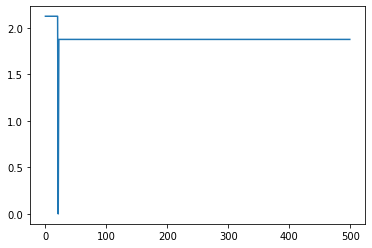

In [52]:
plt.plot(np.arange(num_iter),mselist1)

In [53]:
index1 = np.where(mselist1==np.min(mselist1))[0]
best_theta1 = theta_per_iter1[index1[0]]

In [54]:
print(best_theta1)

[[-0.03153527]
 [ 0.08576055]
 [ 0.02915338]]


In [55]:
h_of_x_p1, y_pred1 = Predict( x_test1, best_theta1)
mse1 = ComputeCost(y_test1, h_of_x_p1)
acc1 = accuracy(y_test1, y_pred1)
print("Test Mean Squared Error: ", mse1)
print("Test Accuracy: ", acc1)

Test Mean Squared Error:  0.0
Test Accuracy:  1.0


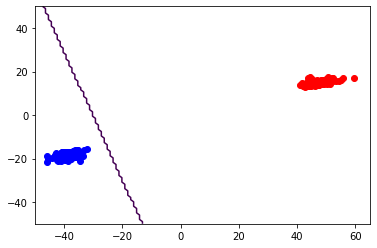

In [56]:
xlist = np.linspace(-50.0, 50.0, 100)
ylist = np.linspace(-50.0, 50.0, 100)
X, Y = np.meshgrid(xlist, ylist)
xplot = np.append(np.expand_dims(np.ones(X.ravel().shape),axis=1),np.expand_dims(X.ravel(),axis=1), axis=1)
xplot = np.append(xplot,np.expand_dims(Y.ravel(), axis=1), axis=1)
Z = Predict(xplot,best_theta1)
plt.scatter(w0.iloc[:,0], w0.iloc[:,1],color='red')
plt.scatter(w1.iloc[:,0], w1.iloc[:,1],color='blue')
plt.contour(X,Y,Z[1].reshape(X.shape), levels=[0])

In [57]:
alpha = np.arange(0.01, 0.99, 0.04)
alphalist = list()
num_iter = 100
for a in alpha:
    theta1, h_of_x1, mse1, mselist1, theta_per_iter1 = Train(a, num_iter, x_train1, y_train1)
    h_of_x_p1, y_pred1 = Predict( x_test1, theta1)
    mse1 = ComputeCost(y_test1, h_of_x_p1)
    acc1 = accuracy(y_test1, y_pred1)
    alphalist.append(mselist1)
    print("Test Mean Squared Error: ", mse1)
    print("Test Accuracy: ", acc1)

Theta:  [[0.53112033]
 [0.58443661]
 [0.55870608]]
Train Mean Squared Error:  2.12448132780083
Test Mean Squared Error:  2.742857142857143
Test Accuracy:  0.3142857142857143
Theta:  [[-1.34439834]
 [-1.07781693]
 [-1.20646959]]
Train Mean Squared Error:  1.8755186721991701
Test Mean Squared Error:  1.2571428571428571
Test Accuracy:  0.6857142857142857
Theta:  [[-3.21991701]
 [-2.74007047]
 [-2.97164526]]
Train Mean Squared Error:  1.8755186721991701
Test Mean Squared Error:  1.2571428571428571
Test Accuracy:  0.6857142857142857
Theta:  [[-5.09543568]
 [-4.40232401]
 [-4.73682094]]
Train Mean Squared Error:  1.8755186721991701
Test Mean Squared Error:  1.2571428571428571
Test Accuracy:  0.6857142857142857
Theta:  [[-6.97095436]
 [-6.06457755]
 [-6.50199661]]
Train Mean Squared Error:  1.8755186721991701
Test Mean Squared Error:  1.2571428571428571
Test Accuracy:  0.6857142857142857
Theta:  [[-8.84647303]
 [-7.72683109]
 [-8.26717228]]
Train Mean Squared Error:  1.8755186721991701
Test M

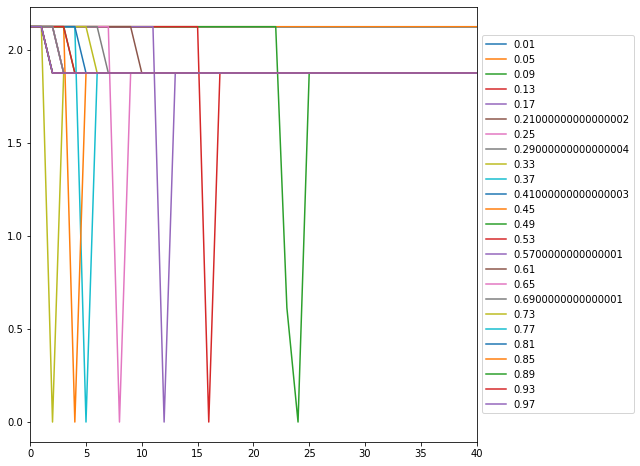

In [58]:
plt.figure(figsize=(8,8))
for i in range(len(alphalist)):
    plt.plot(np.arange(num_iter),alphalist[i],label=alpha[i])
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlim((0,40))
plt.show()